### ultralytics version

In [1]:
import ultralytics
print("Ultralytics version:", ultralytics.__version__)


Ultralytics version: 8.3.169


###  Train (TODO check it after teh changes)

In [2]:
! python train_with_sigma.py

New https://pypi.org/project/ultralytics/8.3.174 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.7.1 CPU (Apple M1 Max)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.5, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dental_data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=1, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.5, mode=train, model=yolo11s.yaml, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolo11n_with_sigma_temp, nbs=64, nms=False, opset=None, optimize=False, optimi

### Model Eval

In [9]:
from ultralytics import YOLO

CKPT = "./runs/detect/yolo11n_with_sigma_orig/weights/best.pt"


# Load the best checkpoint
model = YOLO(CKPT)

# Run validation
metrics = model.val(
    data="dental_data.yaml",   # dataset YAML
    imgsz=800,                 # should match training size
    batch=16,                  # batch size
    device="mps",              # or "cpu", or "0" for GPU
    save_json=True             # optional: save predictions to JSON
)

print(metrics)


Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.7.1 MPS (Apple M1 Max)
YOLO11s summary (fused): 112 layers, 9,428,838 parameters, 0 gradients, 21.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 112.2±20.7 MB/s, size: 15.6 KB)


val: Scanning /Volumes/L/L_PHAS0077/yolo/dental_radiography_yolo/valid/labels.cache... 121 images, 0 backgrounds, 0 corrupt: 100%|██████████| 121/121 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.01s/it]


                   all        121        780      0.757      0.729      0.762      0.499
                Cavity         23         43      0.407      0.419      0.345      0.198
               Implant         59        159      0.937      0.943      0.966      0.644
              Fillings         97        540      0.912      0.817      0.928      0.618
        Impacted Tooth         25         38       0.77      0.737      0.809      0.536
Speed: 0.6ms preprocess, 11.1ms inference, 0.0ms loss, 23.0ms postprocess per image
Saving runs/detect/val/predictions.json...
Results saved to runs/detect/val
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x4e6041990>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,  

### Predict YOLO-σ-Head σ (learned)

In [10]:
from extract_sigma_detections import extract_sigma_detections

CKPT = "./runs/detect/yolo11n_with_sigma_orig/weights/best.pt"
DEVICE = "cpu"
SPLITS = {
        "val": dict(
            SOURCE="/Volumes/L/L_PHAS0077/yolo/dental_radiography_yolo/valid/images",
            OUT_CSV="predictions_val_uncert.csv",
        ),
        "test": dict(
            SOURCE="/Volumes/L/L_PHAS0077/yolo/dental_radiography_yolo/test/images",
            OUT_CSV="predictions_test_uncert.csv",
        ),
    }

extract_sigma_detections(CKPT, DEVICE, SPLITS)

val | 0478_jpg.rf.704066584b84f91fa12ef00316c76c8d.jpg: 2 detections
val | 0103_jpg.rf.a880b4c4b3b709f060808bf114dc93ca.jpg: 10 detections
val | 0807_jpg.rf.32d1bea8b77d054ceb8f1a96b7b4c7e7.jpg: 6 detections
val | 0944_jpg.rf.d5264a28766c902fc8a4bf09ea708f5d.jpg: 8 detections
val | 0442_jpg.rf.fe0d321bfc5e4b546a95811087a2c7d6.jpg: 1 detections
val | 0472_jpg.rf.9672cea13e815b91e89d7ceec881e73d.jpg: 2 detections
val | 0536_jpg.rf.3a7e13dd78ae4edccebbd4f97dc8271e.jpg: 4 detections
val | 0711_jpg.rf.9400d7d1c73565b9221171b9457b2082.jpg: 2 detections
val | 0100_jpg.rf.286d24ae12a47177627f504c5de8330d.jpg: 10 detections
val | 0387_jpg.rf.fc8a11959313fc1aa5200e7032446cfb.jpg: 6 detections
val | 0124_jpg.rf.ece9ebf3c8fe851458a4d443ce47555f.jpg: 2 detections
val | 0488_jpg.rf.15add08e164a3db5a0f1e09f8d09d172.jpg: 18 detections
val | 0995_jpg.rf.7e05c8d7d34d8a551eefafbf0f9520de.jpg: 6 detections
val | 0835_jpg.rf.1c4c9ebcfee3d197b9e06fe7ad79713b.jpg: 8 detections
val | 0759_jpg.rf.e2bebe26c061f

## Analysis

In [1]:
from sigma_uncertainty_analysis import load_data, visualize_stats

# 0. user‐defined paths & params
CSV_PATH    = "predictions_uncert.csv"
IMG_FOLDER  = "/Volumes/L/L_PHAS0077/yolo/dental_radiography_yolo/valid/images"
LABEL_FOLDER= "/Volumes/L/L_PHAS0077/yolo/dental_radiography_yolo/valid/labels"
N_CLUST     = 4       # number of σ‐clusters
IOU_THRESH  = 0.30    # IoU threshold
K_SIGMA     = 3       # σ buffer multiplier

# 1. load both preds and GT
df, df_gt = load_data(CSV_PATH, IMG_FOLDER, LABEL_FOLDER)



Loaded 1,047 predictions from predictions_uncert.csv
           sigma_x      sigma_y
count  1047.000000  1047.000000
mean      2.760093     1.587704
std       0.369349     0.349155
min       1.361957     1.251554
25%       2.529277     1.402591
50%       2.863588     1.490873
75%       2.966600     1.539184
max       3.974755     3.152245
Predicted-area stats (pixels²):
count    1047.000000
mean     1255.122035
std       416.386645
min       201.150090
25%       947.750856
50%      1239.707001
75%      1540.240331
max      2715.667241
Name: pred_area, dtype: float64

Loaded 780 ground-truth boxes
GT-area stats (pixels²):
count     780.000000
mean     1084.733049
std       465.201799
min         5.999232
25%       755.992320
50%       999.991040
75%      1350.003840
max      3290.010496
Name: gt_area, dtype: float64


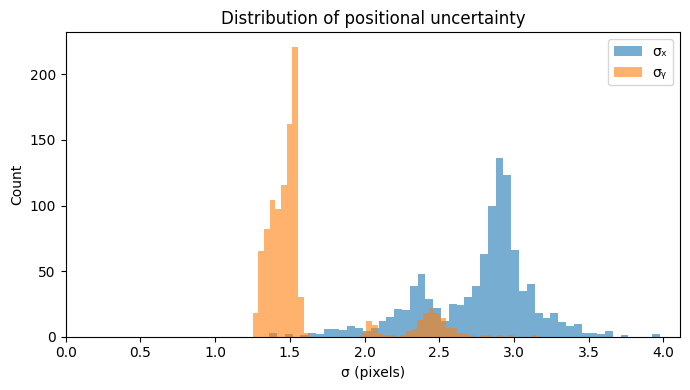

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


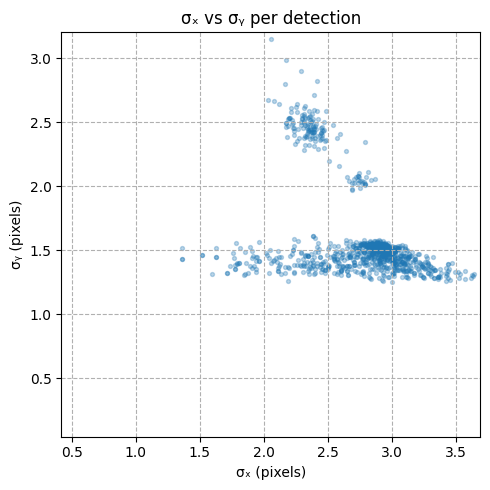

In [2]:
# 2. visualise basic stats and plots
visualize_stats(df, df_gt, CSV_PATH)

Loaded 1,047 detections from predictions_uncert.csv
Loaded GT for 121 images
True positives: 620


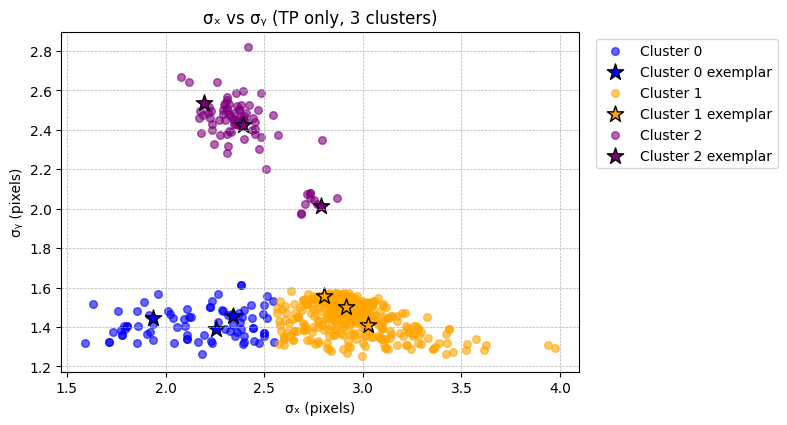

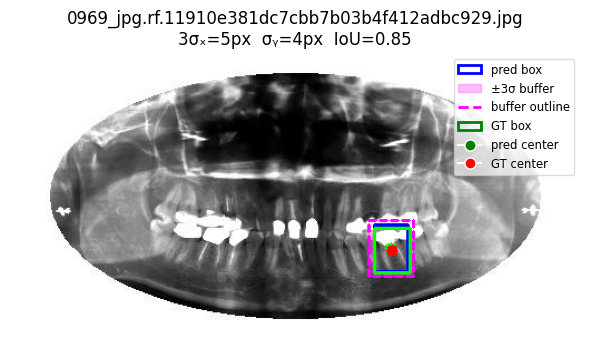

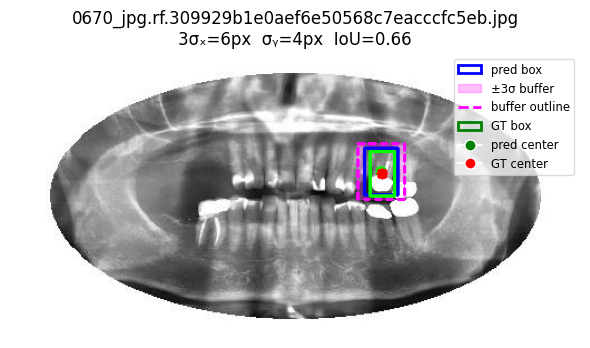

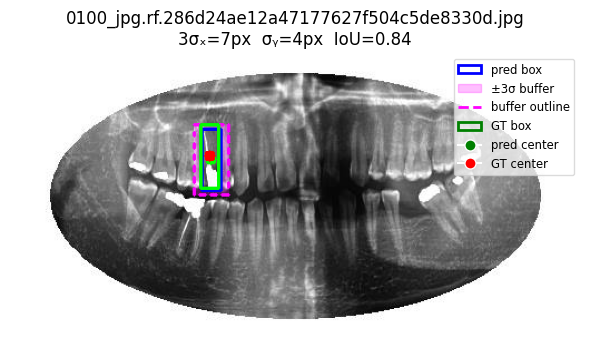

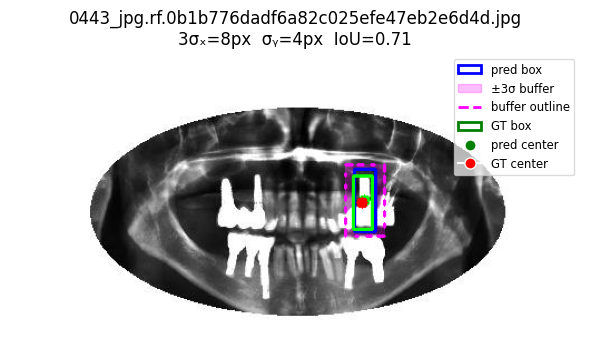

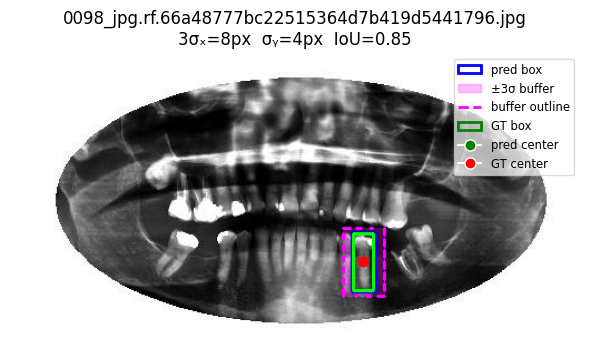

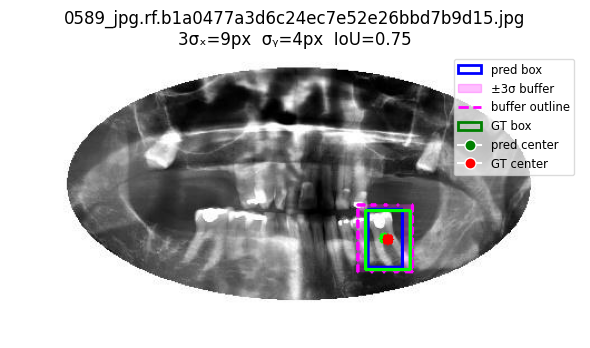

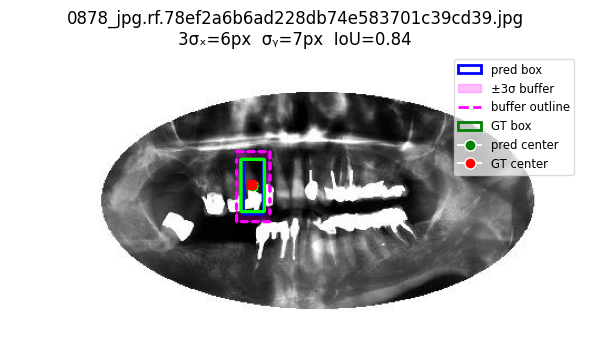

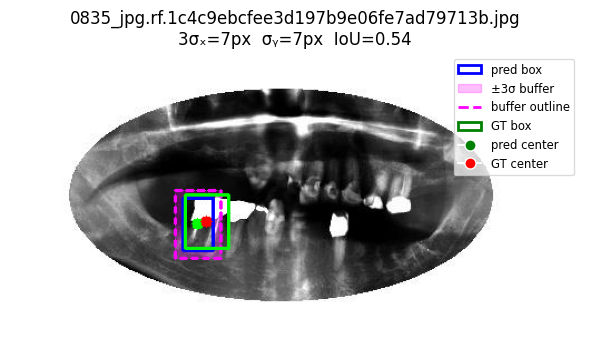

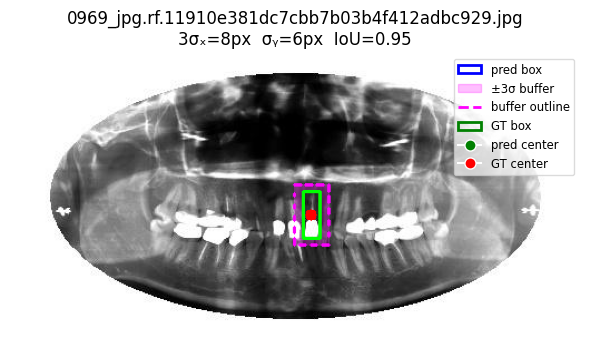

In [1]:
from sigma_uncertainty_analysis import  analyze_uncertainties_clusters
# ======================================================================
PRED_CSV     = "predictions_uncert.csv"   # your σ-Head detections CSV
IMG_FOLDER   = "/Volumes/L/L_PHAS0077/yolo/dental_radiography_yolo/valid/images"
LABEL_FOLDER = "/Volumes/L/L_PHAS0077/yolo/dental_radiography_yolo/valid/labels"

N_CLUST      = 3     # number of σ-clusters
IOU_THRESH   = 0.50  # IoU threshold for true positives
K_SIGMA      = 3     # how many σ to show as buffer

pred_tp = analyze_uncertainties_clusters(
        PRED_CSV,
        IMG_FOLDER,
        LABEL_FOLDER,
        n_clusters=N_CLUST,
        iou_thresh=IOU_THRESH,
        k_sigma=K_SIGMA
   )

Loaded 1,047 detections from predictions_uncert.csv
Loaded GT for 121 images
Kept 620 TPs (IoU ≥ 0.5)


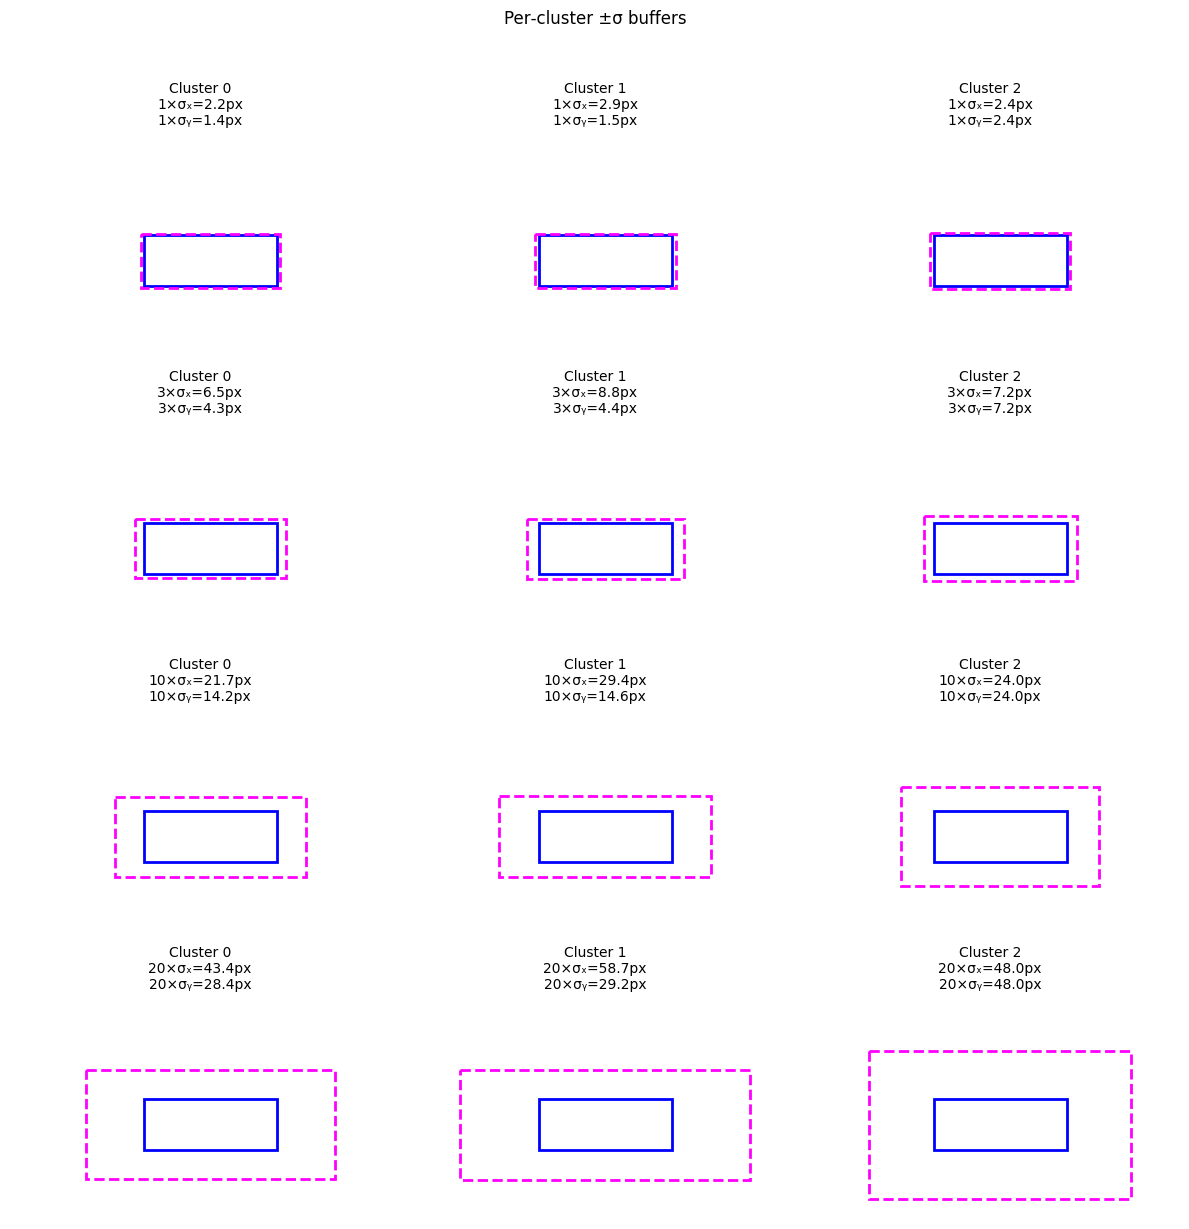

In [4]:
from sigma_uncertainty_analysis import load_and_cluster, plot_sigma_buffers

N_CLUST      = 3     # number of σ-clusters
IOU_THRESH   = 0.50  # IoU threshold for true positives

# Example usage:
pred_tp, clusters = load_and_cluster('predictions_uncert.csv', LABEL_FOLDER, IMG_FOLDER,  n_clusters=N_CLUST, iou_thresh=IOU_THRESH)
plot_sigma_buffers(pred_tp, clusters, buffer_multipliers=[1,3,10,20], buffer_box=(100,100,200,150))


## Calibration

RMSSE uncalibrated = 2.171
RMSSE @k=1 fix      = 1.136
RMSSE MLE          = 1.000


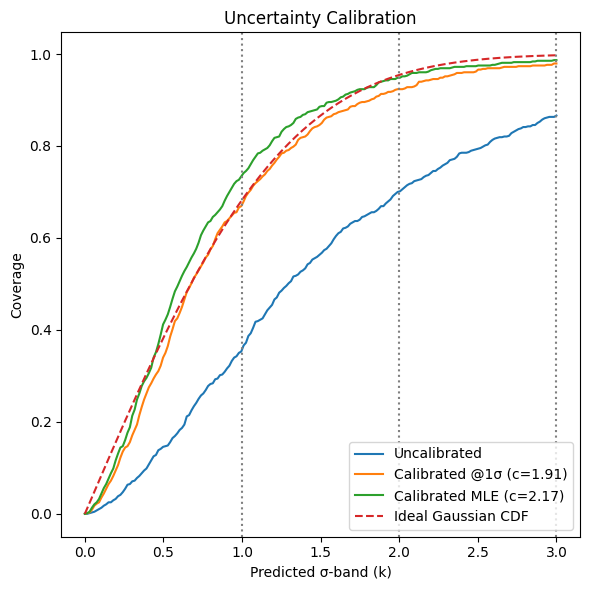

In [5]:

from calibration_util import (
    load_predictions, build_gt_map,
    collect_err_sigma, plot_reliability
)

PRED_CSV     = "predictions_uncert.csv"   # your σ-Head detections
IMG_FOLDER   = "/Volumes/L/L_PHAS0077/yolo/dental_radiography_yolo/valid/images"
LABEL_FOLDER = "/Volumes/L/L_PHAS0077/yolo/dental_radiography_yolo/valid/labels"

# 1. Load data
pred = load_predictions(PRED_CSV)
gt_map = build_gt_map(
    IMG_FOLDER,
   LABEL_FOLDER
)

# 2. Match and compute errors
rows = collect_err_sigma(pred, gt_map, iou_thresh=0.30)

# 3. Plot calibration curves
plot_reliability(rows, k_max=3.0, n_k=200,
                 title="Uncertainty Calibration")


###  Test Calibration on the test data 

Stage A – validation
  fitted c_simple=1.355  c_mle=1.951

Validation set RMSSE:
  Uncalibrated = 1.951
  @k=1 fix     = 1.440
  MLE          = 1.000

Stage B – test

Test set RMSSE:
  Uncalibrated = 2.077
  @k=1 fix     = 1.534
  MLE          = 1.065

Empirical coverage @ k=2.0
  Validation:    Uncalibrated = 0.796, Fixed@1σ = 0.882, MLE = 0.933
  Test:          Uncalibrated = 0.787, Fixed@1σ = 0.868, MLE = 0.937


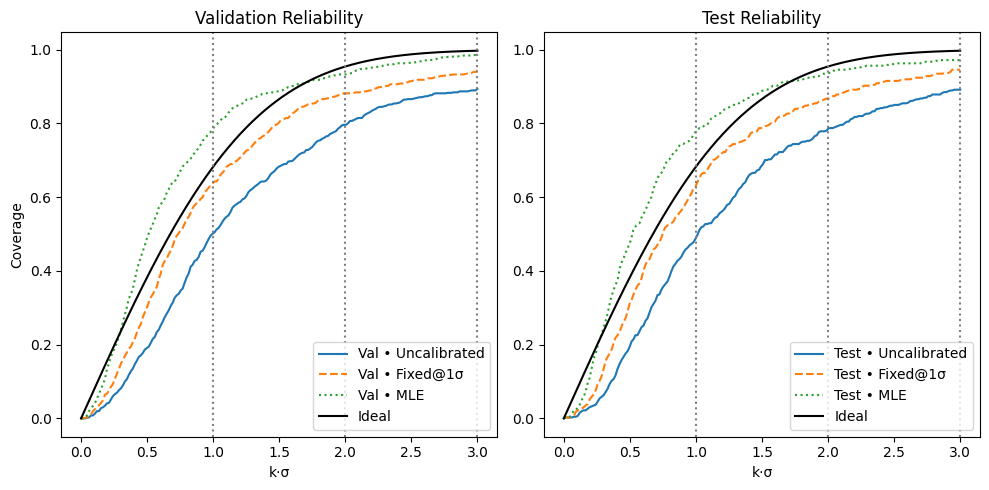

In [1]:
from calibration_util import evaluate_on_datasets

VAL = {
    "PRED_CSV" : "predictions_val_uncert.csv",
    "IMG_FOLDER" : "/Volumes/L/L_PHAS0077/yolo/dental_radiography_yolo/valid/images",
    "LABEL_FOLDER" : "/Volumes/L/L_PHAS0077/yolo/dental_radiography_yolo/valid/labels",
}
TEST = {
    "PRED_CSV" : "predictions_test_uncert.csv",
    "IMG_FOLDER" : "/Volumes/L/L_PHAS0077/yolo/dental_radiography_yolo/test/images",
    "LABEL_FOLDER" : "/Volumes/L/L_PHAS0077/yolo/dental_radiography_yolo/test/labels",
}

evaluate_on_datasets(VAL, TEST)
